# SGD Classifier
---
- LogisticRegression + SGD(확률적경사하강법) 적용한 분류
- 필수 파라미터 => 손실함수 설정

In [1]:
# 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [2]:
# 경고 무시 ---------------------------------
# 향후 deprecated 된다는 경고 출력 막음
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 파일 관련
FILE='../Data1/fish.csv'

## [1] 데이터 준비

In [4]:
fish = pd.read_csv(FILE)

In [5]:
print(fish.shape, fish.columns, sep='\n\n')

(159, 6)

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')


In [6]:
# 특성 데이터 + 타겟 분리
# fish_input = fish[fish.columns[1:]].
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

In [7]:
# 학습용, 테스트용 데이터 분리 => 8:2
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state=42)

In [8]:
## 표준화 평균 0, 표준편차 1
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## [2] 모델 생성 및 학습

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
# 최적화 경사하강법 변경 => BGD => SGD 
# loss = 손실함수 : 모델에 따라 다름   => 'log' 곧 deprecated 예정
# max_iter = 1000 기본값 : 학습 횟수
sc = SGDClassifier(loss='log_loss',
                  max_iter=10,
                  random_state=42)
# 학습 진행 fit() : 반복 횟수 즉 max_iter 만큼 학습
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [11]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [12]:
## 1 epoch만 학습       ###partial_fit() - 1 epoch만 학습 진행###
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [13]:
# 분류 항목
classes = np.unique(train_target)

In [14]:
print('classes: ', classes)

classes:  ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [15]:
## 최적의 학습 횟수 찾기
x = []
y = []
for i in range(1, 300):
    sc = SGDClassifier(loss='log_loss',
                  max_iter=i,
                  random_state=42)
    sc.fit(train_scaled, train_target)
    x.append(sc.score(train_scaled, train_target))
    y.append(sc.score(test_scaled, test_target))

In [16]:
## 최적의 학습 횟수 찾기
a = []
b = []
for i in range(1, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    a.append(sc.score(train_scaled, train_target))
    b.append(sc.score(test_scaled, test_target))

In [17]:
print(x)
print('-------------------------------------------------------------')
print(a)


[0.5294117647058824, 0.6554621848739496, 0.6554621848739496, 0.7226890756302521, 0.6554621848739496, 0.6470588235294118, 0.8067226890756303, 0.7983193277310925, 0.7478991596638656, 0.773109243697479, 0.7226890756302521, 0.7142857142857143, 0.680672268907563, 0.6722689075630253, 0.7983193277310925, 0.7478991596638656, 0.7310924369747899, 0.7058823529411765, 0.773109243697479, 0.6134453781512605, 0.6890756302521008, 0.7310924369747899, 0.7310924369747899, 0.7563025210084033, 0.7563025210084033, 0.8151260504201681, 0.7563025210084033, 0.8067226890756303, 0.8235294117647058, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.8403361344537815, 0.

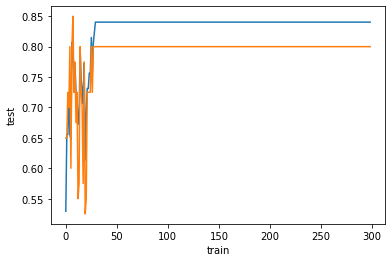

In [18]:
import matplotlib.pyplot as plt
plt.plot(x)
plt.plot(y)
plt.xlabel('train')
plt.ylabel('test')
plt.show()

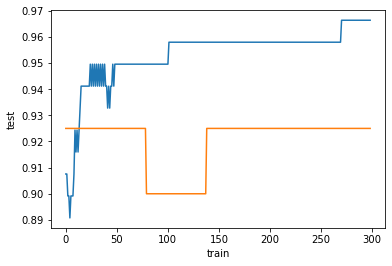

In [19]:
plt.plot(a)
plt.plot(b)
plt.xlabel('train')
plt.ylabel('test')
plt.show()

In [20]:
import sklearn
pd.__version__, np.__version__, sklearn.__version__

('1.4.2', '1.21.5', '1.1.1')

## 학습 횟수(epoch)와 과/소 적합

In [21]:
## 최적 epoch 수로 학습 진행

In [26]:
sc = SGDClassifier (loss='log', max_iter=2000, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [28]:
# early_stopping : 조기종료 여부 (기본값:False)
# n_iter_no_change : n번 동안 변경 되지 않은 경우 early_stopping 이 True
# tol : 성능 개선의 기준값
sc = SGDClassifier(loss='log', tol=1.0,
                  random_state=42,
                  n_iter_no_change=10,
                  early_stopping=True)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.n_iter_)

0.8319327731092437
0.875
11
